## Task 1

In [1]:
import array
import numpy as np
import matplotlib.pyplot as plt


binfpath="/fs/lustre/cita/hqchen/data/z-ifrit-a=0.1401.bin"
with open(binfpath,'rb') as f:
    binarydata=f.read()
lllen=8; flen=4; ilen=4 

N=1024

firstfield=lllen*2+3*ilen

nextfield=firstfield

xHI=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])


xHI=np.reshape(xHI,(N,N,N),order='F')

nextfield+=lllen+N**3*flen
delta=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])
delta=np.reshape(delta,(N,N,N),order='F')

nextfield+=lllen+N**3*flen
T=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])
T=np.reshape(T,(N,N,N),order='F')




/tmp/ipykernel_3368685/591149048.py:8: RuntimeWarning: divide by zero encountered in log10
  im2  = ax2.imshow(np.log10(delta[0]))
/tmp/ipykernel_3368685/591149048.py:14: RuntimeWarning: divide by zero encountered in log10
  im3 = ax3.imshow(np.log10(T[0]))


Text(0.5, 0.98, 'A plot of a slice of $\\log(T)$')

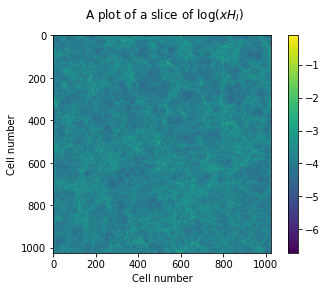

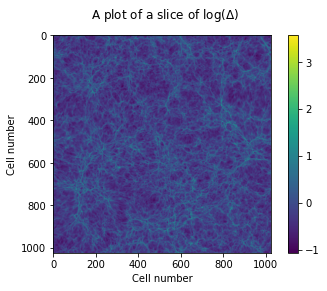

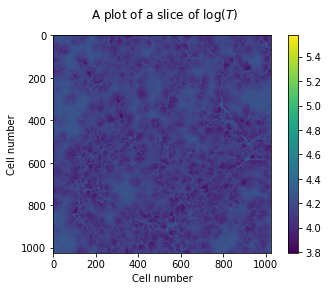

In [2]:
fig1, ax1 = plt.subplots()
im1 = ax1.imshow(np.log10(xHI[0]))
ax1.set(xlabel = "Cell number", ylabel = "Cell number")
fig1.colorbar(im1)
fig1.suptitle("A plot of a slice of $\log(xH_I)$")

fig2, ax2 = plt.subplots()
im2  = ax2.imshow(np.log10(delta[0]))
fig2.colorbar(im2)
ax2.set(xlabel = "Cell number", ylabel = "Cell number")
fig2.suptitle("A plot of a slice of $\log(\Delta)$")

fig3, ax3 = plt.subplots()
im3 = ax3.imshow(np.log10(T[0]))
fig3.colorbar(im3)
ax3.set(xlabel = "Cell number", ylabel = "Cell number")
fig3.suptitle("A plot of a slice of $\log(T)$")

## Task 2

In [3]:
import astropy

In [4]:
from astropy.cosmology import WMAP9 as cosmo
from astropy import units as u
crt_dns = cosmo.critical_density(6)
mean_gas_density = crt_dns*cosmo.Ob(6)
print(mean_gas_density)

1.432778841086186e-28 g / cm3


## Task 3

In [5]:
from astropy.constants import m_p
p = m_p.to(u.g)


In [6]:
print(delta.max())
index = np.where(delta == delta.max())
print(index[0])

39938.367
[203]


In [7]:
print(index[2])
print(delta[index][0])

[460]
39938.367


In [8]:
sigma  = 4.48e-18*u.cm**2
nH =  (0.76*mean_gas_density/p)
nHI = xHI*nH
nHI = nHI.astype('float128')
cml = (40/0.68)/1024*u.Mpc 
ds = cml*(1/(1+6))
ds = ds.to(u.cm)
dT = sigma * nHI * ds

In [9]:
print(dT[index][0])

2.2700645736128338


In [10]:
print(nHI.max())

5.547614273382351e-05 1 / cm3


## Task 4

In [13]:
from numpy import float128
print(nHI)

[[[6.74571377e-09 6.38827302e-09 5.75865577e-09 ... 1.07600648e-08
   8.21360135e-09 7.04414260e-09]
  [7.67662289e-09 6.92509960e-09 6.13529849e-09 ... 1.13985843e-08
   9.96054794e-09 8.55018278e-09]
  [9.01550923e-09 7.51253726e-09 6.50632348e-09 ... 1.14072840e-08
   1.12177583e-08 1.05493712e-08]
  ...
  [5.40711653e-09 5.72221870e-09 6.19928953e-09 ... 6.03759931e-09
   5.55259971e-09 5.45984546e-09]
  [5.71314507e-09 5.72291681e-09 5.85148463e-09 ... 7.31123873e-09
   6.16871665e-09 5.86614579e-09]
  [6.06233908e-09 5.96980865e-09 5.72571146e-09 ... 9.11899800e-09
   6.97984026e-09 6.31654506e-09]]

 [[5.48221868e-09 5.28250510e-09 5.17780352e-09 ... 8.64833005e-09
   7.15157933e-09 6.03492856e-09]
  [6.61523991e-09 5.69851810e-09 5.04244824e-09 ... 9.86796511e-09
   9.04403130e-09 7.89581023e-09]
  [8.48688053e-09 6.67445255e-09 5.43424594e-09 ... 9.99739669e-09
   1.04928599e-08 1.01232711e-08]
  ...
  [5.35914690e-09 5.90746518e-09 6.73172940e-09 ... 5.94980287e-09
   5.42529

In [11]:
from numpy import float128

new_tau = dT[index][0]
print(new_tau)
percent = float128(10)
percent = float128(np.exp(-new_tau)*100)
print(percent)

2.2700645736128338
10.3305509057770924745


## Task 5

In [12]:
halofpath="/fs/lustre/cita/hqchen/data/hlist_0.14005.list"
halodata = np.loadtxt(halofpath, skiprows = 63) 

halomass = halodata[:, 10]




#mass = []
#for i in range(len(halodata)):
#    mass = np.append(mass, float128(halodata[i][83:94]))

[]

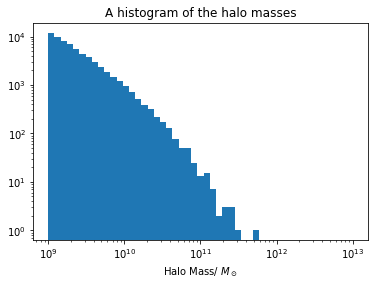

In [16]:
plt.hist(halomass, bins = np.logspace(start =np.log10(10**9), stop = np.log10(10**13)))
plt.gca().set_xscale("log")
plt.title("A histogram of the halo masses")
plt.xlabel("Halo Mass/ $M_\odot$")
plt.loglog()




## Task 6

/tmp/ipykernel_3368685/2011251566.py:25: RuntimeWarning: divide by zero encountered in log10
  im2  = ax2.imshow(np.log10(delta[0]))
/tmp/ipykernel_3368685/2011251566.py:33: RuntimeWarning: divide by zero encountered in log10
  im3 = ax3.imshow(np.log10(T[0]))


Text(0.5, 0.98, 'A plot of a slice of $\\log(T)$')

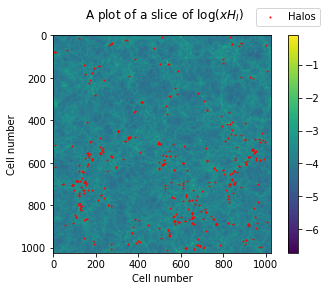

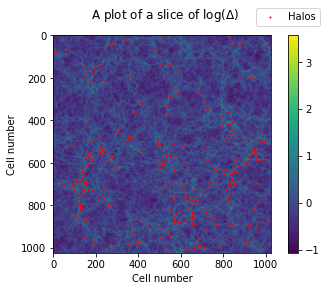

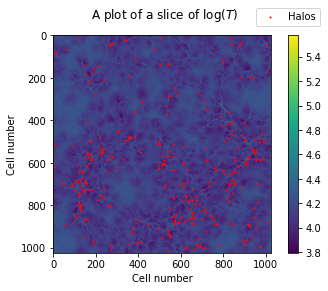

In [13]:
x, y, z = halodata[:, 17], halodata[:, 18], halodata[:, 19]

m = 1024*0.9839115/(40)
x, y, z = m*x, m*y, m*z




x_int = x.astype(int)
indices = np.where(x_int ==0)
y_int = y[indices]
z_int = z[indices]


fig1, ax1 = plt.subplots()
im1 = ax1.imshow(np.log10(xHI[0]))
ax1.set(xlabel = "Cell number", ylabel = "Cell number")
ax1.scatter(z_int, y_int, color='red', s=1, label= 'Halos')
ax1.legend(loc = 'upper right', bbox_to_anchor = (1.25, 1.15))

fig1.colorbar(im1)
fig1.suptitle("A plot of a slice of $\log(xH_I)$")

fig2, ax2 = plt.subplots()
im2  = ax2.imshow(np.log10(delta[0]))
ax2.scatter(z_int, y_int, color='red', s=1, label= 'Halos')
ax2.legend(loc = 'upper right', bbox_to_anchor = (1.25, 1.15))
fig2.colorbar(im2)
ax2.set(xlabel = "Cell number", ylabel = "Cell number")
fig2.suptitle("A plot of a slice of $\log(\Delta)$")

fig3, ax3 = plt.subplots()
im3 = ax3.imshow(np.log10(T[0]))
ax3.scatter(z_int, y_int, color='red', s=1, label= 'Halos')
ax3.legend(loc = 'upper right', bbox_to_anchor = (1.25, 1.15))
fig3.colorbar(im3)
ax3.set(xlabel = "Cell number", ylabel = "Cell number")
fig3.suptitle("A plot of a slice of $\log(T)$")



/tmp/ipykernel_2926192/2493785927.py:11: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig4.colorbar(im1)


Text(0.5, 0.98, 'A plot of a slice of $\\log(xH_I)$')

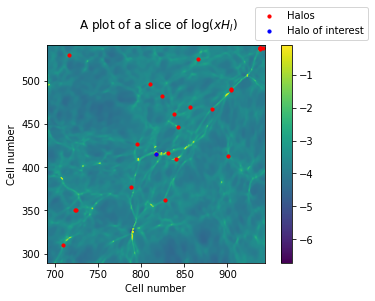

In [18]:

pointz, pointy = z[indices[0][0]], y[indices[0][0]]

fig4, ax4 = plt.subplots()
im4 = ax4.imshow(np.log10(xHI[0]))
ax4.set(xlabel = "Cell number", ylabel = "Cell number")
ax4.set_xlim([pointz-5*m, pointz + 5*m])
ax4.set_ylim([pointy - 5*m, pointy+5*m])
ax4.scatter(z_int, y_int, color='red', s=10, label= 'Halos')
ax4.scatter(pointz, pointy, color = 'blue', s=10, label = 'Halo of interest')
ax4.legend(loc = 'upper right', bbox_to_anchor = (1.5, 1.20))
fig4.colorbar(im1)
fig4.suptitle("A plot of a slice of $\log(xH_I)$")


## Task 7

/tmp/ipykernel_2926192/2979926674.py:19: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig4.colorbar(im1)


Text(0.5, 0.98, 'A plot of a slice of $\\log(xH_I)$')

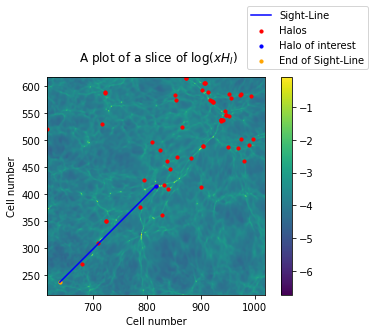

In [19]:
from sympy.solvers import solve
from sympy import Symbol

length = 10*m

pointsz = [pointz, pointz - length/np.sqrt(2)]
pointsy = [pointy, pointy - length/np.sqrt(2) ]

fig4, ax4 = plt.subplots()
im4 = ax4.imshow(np.log10(xHI[0]))
ax4.set(xlabel = "Cell number", ylabel = "Cell number")
ax4.set_xlim([pointz-8*m, pointz + 8*m])
ax4.set_ylim([pointy - 8*m, pointy+8*m])
ax4.plot(pointsz, pointsy, color = 'blue', label = 'Sight-Line')
ax4.scatter(z_int, y_int, color='red', s=10, label= 'Halos')
ax4.scatter(pointz, pointy, color = 'blue', s=10, label = 'Halo of interest')
ax4.scatter(pointz - length/np.sqrt(2), pointy - length/np.sqrt(2), color = 'orange', s=10, label = 'End of Sight-Line')
ax4.legend(loc = 'upper right', bbox_to_anchor = ( 1.5, 1.35))
fig4.colorbar(im1)
fig4.suptitle("A plot of a slice of $\log(xH_I)$")


Text(0, 0.5, 'Density contrast')

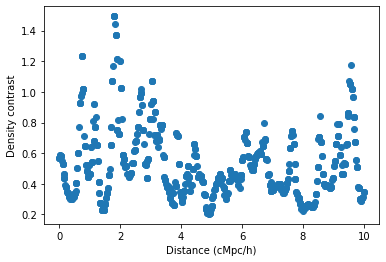

In [20]:
t = np.linspace(0, 1, 1000)



sight = (np.array((-length/np.sqrt(2), -length/np.sqrt(2)))) * t[:, None] + np.array((pointz, pointy))
#for i in range(len(t)):
#    sight[i] = t[i]*(np.array((-length/np.sqrt(2), -length/np.sqrt(2)))) + np.array((pointz, pointy))

sight = np.around(sight)
sight = sight.astype(int)

density = np.zeros(len(t))


for i in range(len(t)):
    density[i] = delta[0][sight[i][0]][sight[i][1]]

distance = np.linalg.norm((sight- np.array((pointz, pointy))), axis = 1)


distance = distance/m

plt.scatter(distance, density)
plt.xlabel('Distance (cMpc/h)' )
plt.ylabel('Density contrast')

## Analyzing Lyman Limit Systems

In [24]:
#Function to choose a Lymann Limit system given a LOS 
length = 50*m

def lyman(start, direction):
    ''' A function to select a Lyman Limit System given a start point and an end point
    Parameters
    __________
    start : contains the positional cooridinates of the start point
           numpy array
    end : contains the positional coordinates of the end point
           numpy array
    '''
    t = np.linspace(0, 1, 1000)
    sight, new_sight =  start + t[:, None]*(length*direction), start + t[:, None]*(length*direction)
    LLS = np.array([])
    LLS_trunc = np.array([])
   

    for i in range(len(t)):
        while new_sight[i][0]<0:
            new_sight[i][0] = 1023 + new_sight[i][0]
        
        while new_sight[i][1]<0:
            new_sight[i][1] = 1023 + new_sight[i][1]
            
        while new_sight[i][2]<0:
            new_sight[i][2] = 1023 + new_sight[i][2]
            
   
    
        while new_sight[i][0]>1023:
            new_sight[i][0] = new_sight[i][0] - 1023
        
        while new_sight[i][1]>1023:
            new_sight[i][1] = new_sight[i][1] - 1023
        
        while new_sight[i][2]>1023:
            new_sight[i][2] = new_sight[i][2] - 1023
            
       
    sight = np.around(sight)
    sight = sight.astype(int)
    new_sight = np.around(new_sight)
    new_sight = new_sight.astype(int)
    density = np.zeros(len(t))
   
    for i in range(len(t)):
        density[i] = delta[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]]
        if density[i]>10**2 and sight[i].any()!= LLS.any():
            LLS = np.append(LLS, np.ndarray.tolist(sight[i]))
            LLS_trunc = np.append(LLS_trunc, np.ndarray.tolist(new_sight[i]))
    return LLS, LLS_trunc, sight, new_sight
    

In [25]:
from scipy.signal import argrelextrema

In [26]:
x, y, z = halodata[:, 17], halodata[:, 18], halodata[:, 19]

m = 1024*0.9839115/(40)
x, y, z = m*x, m*y, m*z


x = np.array(x)
y = np.array(y)
z = np.array(z)


ix = np.random.randint(0, len(x)-1)
iy = np.random.randint(0, len(y)-1)
iz = np.random.randint(0, len(z)-1)

start = np.array((x[ix], y[iy], z[iz]))
print(start)

[ 60.95906347 526.53754724 684.77746775]


(0.0, 400.0)

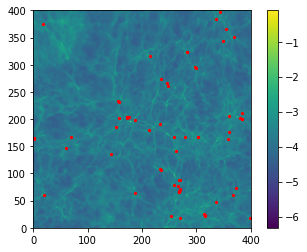

In [27]:
#Checking if the sampling of the start point is correct

x_int = np.asarray(x, dtype = 'int')

indices = np.where(x_int ==x_int[ix])
y_int = y[indices]
z_int = z[indices]


plt.scatter(z_int, y_int, s = 5, color = 'red')
plt.imshow(np.log10(xHI[x_int[ix]]))
plt.colorbar()
plt.ylim([0, 400])
plt.xlim([0, 400])


In [28]:
#Finding the biggest 20 halos 

ind  = np.argpartition(halomass, -20)[-20:]

startx, starty, startz = x[ind], y[ind], z[ind]

start = np.dstack((startx, starty, startz))[0]


In [26]:
from sympy import *


dns_max = [] 
dist_max = []
tot_dist = np.array([])


count = 0

for count in range(19):
    output = []
    output_true = []
    
    count += 1 
    print(count)
    for i in range(5000):
        phi = np.random.uniform(0,2*pi)
        costheta = np.random.uniform(-1,1)
        theta = acos( costheta )

        posx =  sin( theta) * cos( phi )
        posy =  sin( theta) * sin( phi )
        posz =  cos( theta )

        direction = np.asarray((posx, posy, posz), dtype ='float64')

        lls_true, lls_trunc, sight, new_sight = lyman(start[count], direction)

        if lls_true.size > 0:
            output.append(np.ndarray.tolist(lls_trunc))
            output_true.append(np.ndarray.tolist(lls_true))
            #Code for finding the local density maxima on a sightline

            d, dns_sight = np.zeros(len(sight)), np.zeros(len(sight)) 

            d = np.linalg.norm((sight - start[count]), axis = 1)
            d = d/m
            for j in range(len(sight)):
                #d[j]= np.linalg.norm(sight[j] - startpoint)
                dns_sight[j] = delta[new_sight[j][0]][new_sight[j][1]][new_sight[j][2]]
            dns_sight = dns_sight[np.where(d>1)]
            d = d[np.where(d>1)]
            sight_max = argrelextrema(dns_sight, np.greater)
            max_val, d_max = [dns_sight[k] for k in sight_max], [d[k] for k in sight_max]
            dns_max = np.append(dns_max, np.array(max_val))
            dist_max = np.append(dist_max, np.array(d_max))
            if d.max()>256:
                plt.plot(d, dns_sight)
    
    output.sort()
    output_true.sort()
    newout = np.unique(output, axis = 0)
    newout_true = np.unique(output_true, axis = 0)
    newout = np.asarray(newout, dtype = 'int')
    
    distance = np.linalg.norm((newout_true-start[count]), axis = 1) 
    
    #MUST RECHECK THIS DISTANCE STUFF
    distance = distance/m
    
    tot_dist = np.append(tot_dist, distance)
    

        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


IndexError: index 20 is out of bounds for axis 0 with size 20

In [ ]:
print(tot_dist)

In [ ]:
#These are for a single halo
'''
output.sort()
output_true.sort()
newout = np.unique(output, axis = 0)
newout_true = np.unique(output_true, axis = 0)
newout = np.asarray(newout, dtype = 'int')

print(newout) 
'''


In [ ]:
#These are for a single halo
'''
from matplotlib.pyplot import cm
x = np.unique(newout[:,0], axis= 0)

color = iter(cm.viridis(np.linspace(0, 1, len(newout))))
for i in range(len(newout)):
    count = 1
    if i>0 and newout[i][0] == newout[i-1][0]:
        count = count + 1 
    c = next(color)
    y = list(filter(lambda x: x[0] == newout[i][0], newout))
    for point in y:
        plt.scatter(point[2], point[1], s = 5, color = 'red')
        plt.scatter(start[3], start[2], s= 10, color = 'red')
    if count == 1:
        plt.imshow(np.log10(delta[newout[i][0]]))
        plt.title('A slice at x = ' + str(newout[i][0]))
        plt.colorbar()
        plt.show()
print(x)
'''


In [ ]:
#These are for a single halo
'''
#Now, we will plot the number of LLS a particular distance from the quasar
distance = np.linalg.norm((newout_true-start), axis = 1)
#MUST RECHECK THIS DISTANCE STUFF
distance = distance/m

print(distance)
'''


Text(0.5, 1.0, 'Histogram of distances to LLS')

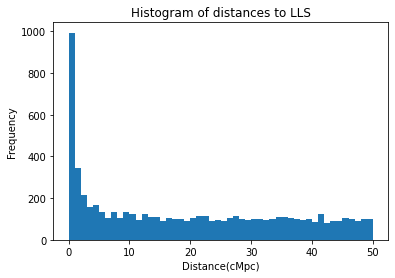

In [27]:
plt.hist(tot_dist, bins=50)
plt.xlabel('Distance(cMpc)')
plt.ylabel('Frequency')
#plt.xlim([1, 50])
plt.ylim()
plt.title('Histogram of distances to LLS')

Text(0.5, 1.0, 'Maximum density contrast vs. distance of LLS')

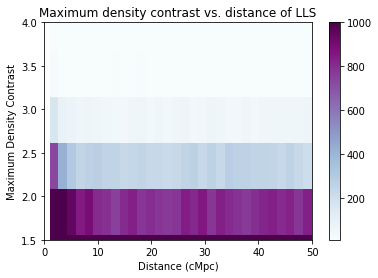

In [28]:
import matplotlib
#Now we will plot a histogram of the local maxima of the density contrast, along with the distance at which they occur

 
plt.hist2d(dist_max, np.log10(dns_max), bins = (30, 10), cmap=plt.cm.BuPu,vmin=10,vmax=1000)#, norm=matplotlib.colors.LogNorm())
plt.colorbar()


plt.xlim([0, 50])
plt.ylim([1.5, 4])

plt.xlabel('Distance (cMpc)')
plt.ylabel('Maximum Density Contrast')
plt.title('Maximum density contrast vs. distance of LLS')


In [ ]:
#Plotting the density contrast and the neutral hydrogen fraction for some sight-lines

for startpoint in start:

    for i in range(10):
        direction = np.array((np.random.randint(0, 1023), np.random.randint(0, 1023), np.random.randint(0, 1023)))
        direction = direction/(np.linalg.norm(direction))
        lls, lls_trunc, sight, new_sight = lyman(startpoint, direction)
        #Code for finding the local density maxima on a sightline
        xHI_sight, dns_sight = np.zeros(len(sight)), np.zeros(len(sight)) 
        d = np.linalg.norm((sight - startpoint), axis = 1)
        d = d/m
        for j in range(len(sight)):
            dns_sight[j] = delta[new_sight[j][0]][new_sight[j][1]][new_sight[j][2]]
            xHI_sight[j] = xHI[new_sight[j][0]][new_sight[j][1]][new_sight[j][2]]
        fig, ax = plt.subplots()   
        ax2 = ax.twinx()
        ax.plot(d, dns_sight, color = 'blue')
        ax2.plot(d, xHI_sight, color='red')
        ax.axhline(y = np.mean(dns_sight), color = 'blue', ls ='--')
        ax2.axhline(y= np.mean(xHI_sight), color ='red', ls ='--')

        ax.set_yscale('log')
        ax.set_xlabel('Distance(cMpc)')
        ax.set_ylabel('$\Delta_g$', color = 'blue')
        ax.set_xlim([1, 10])
        ax2.set_yscale('log')
        ax2.set_ylabel('$x$HI', color = 'red')
        plt.show()



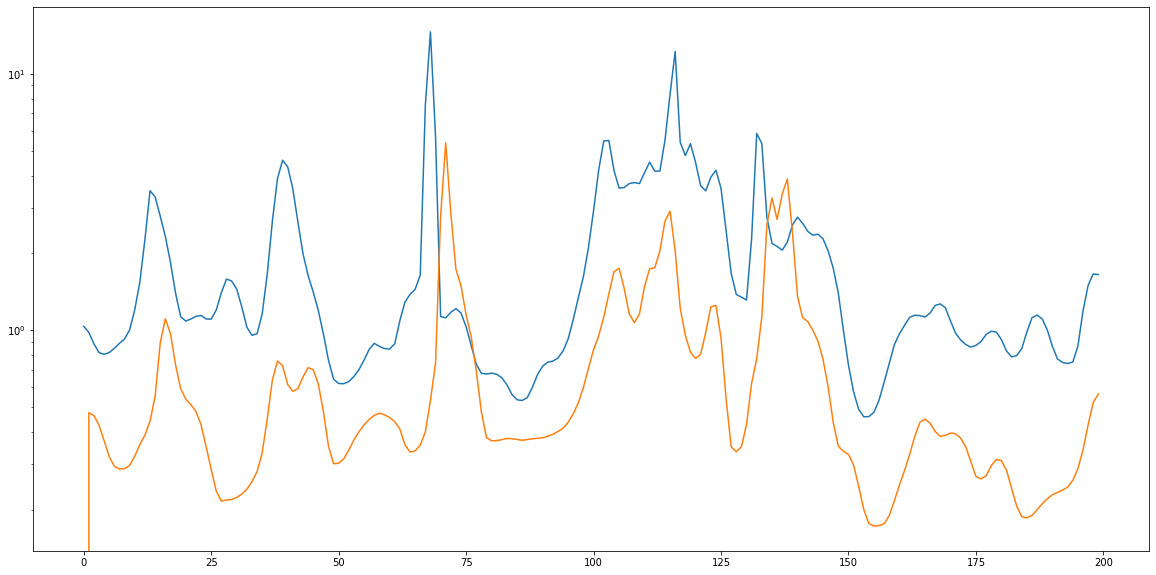

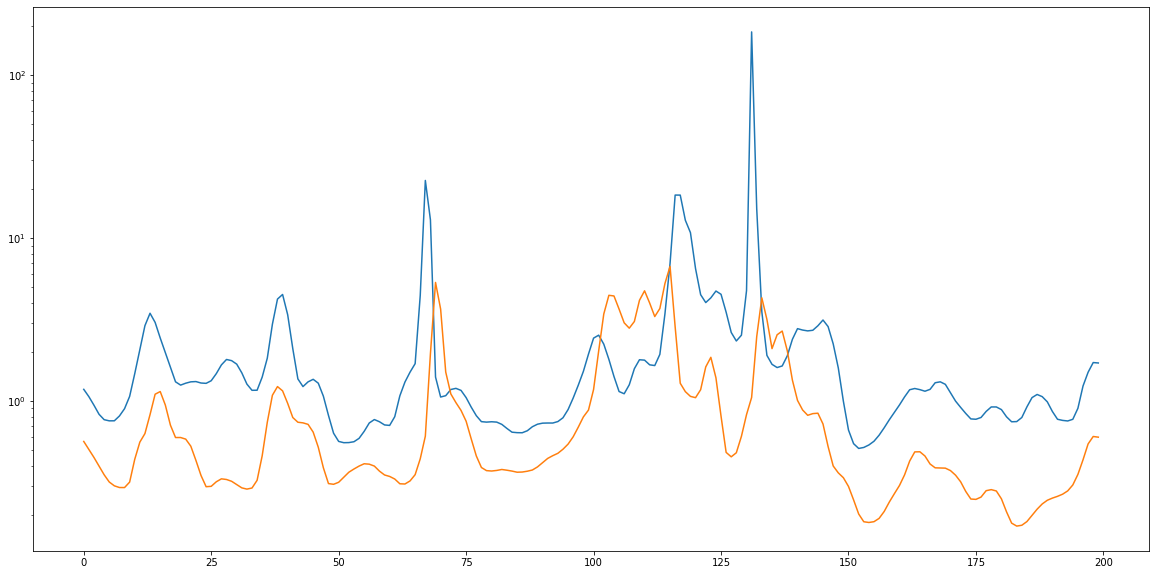

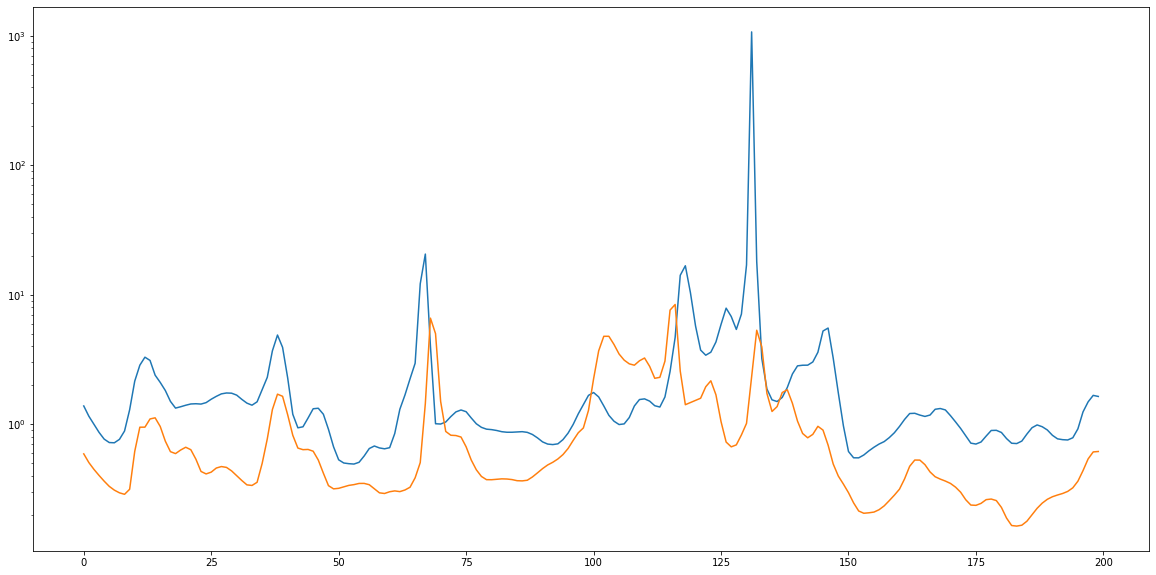

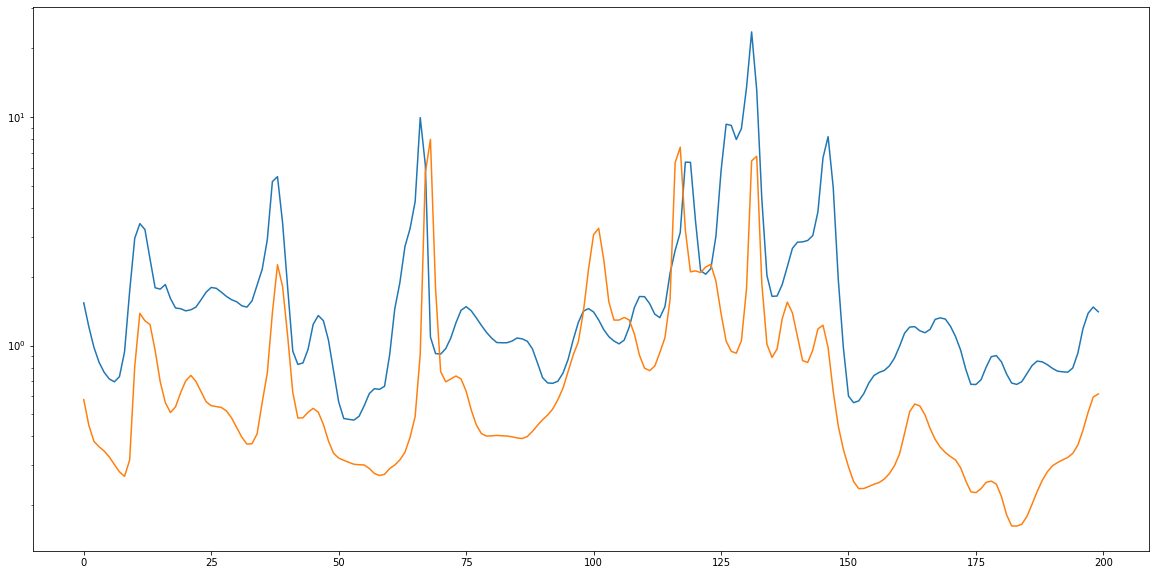

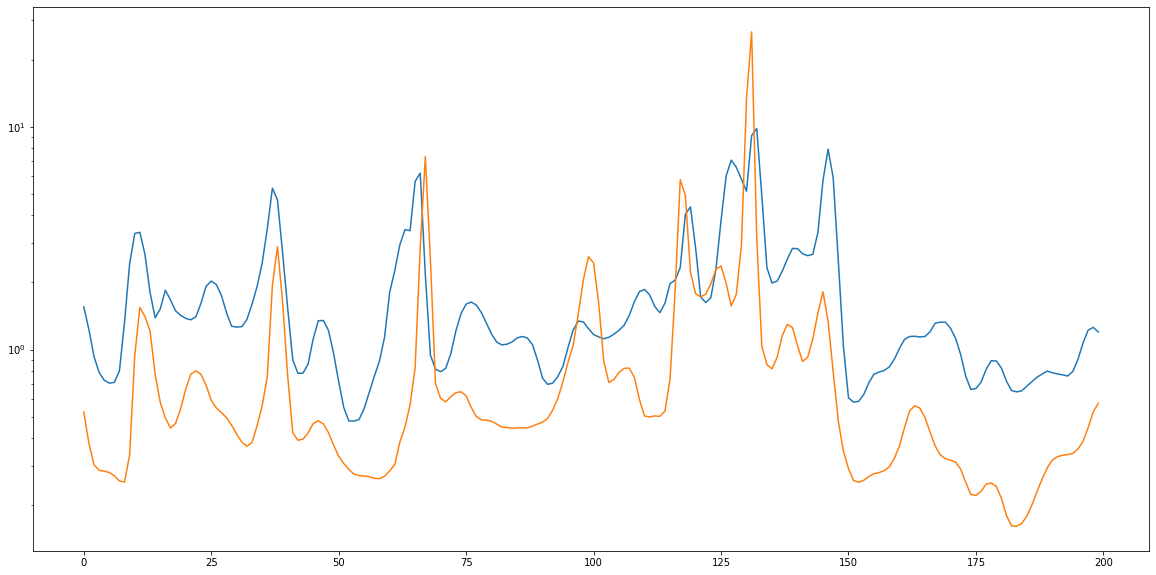

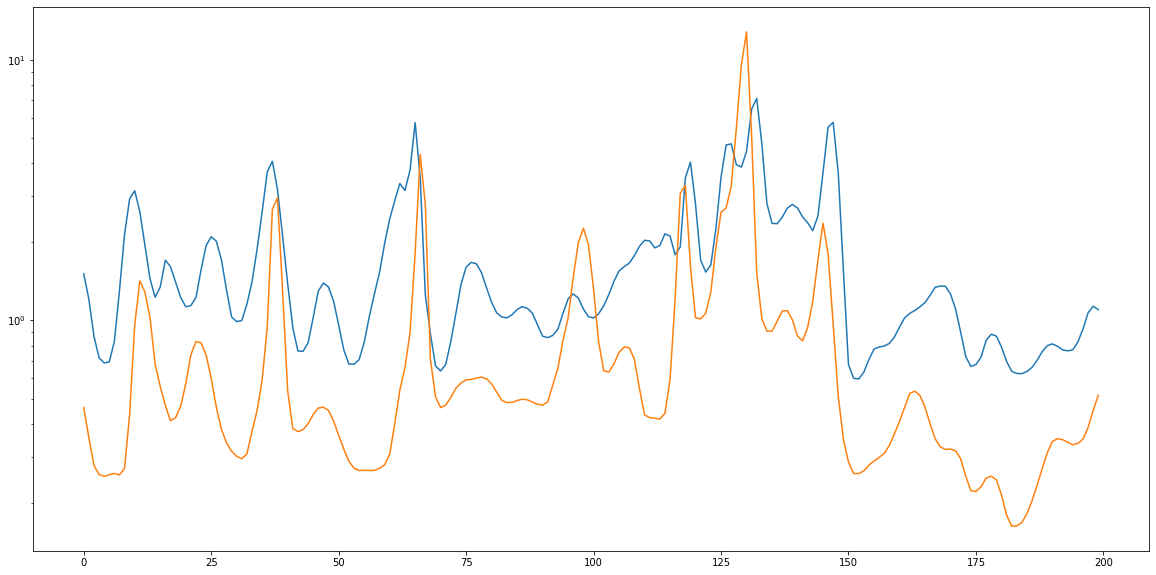

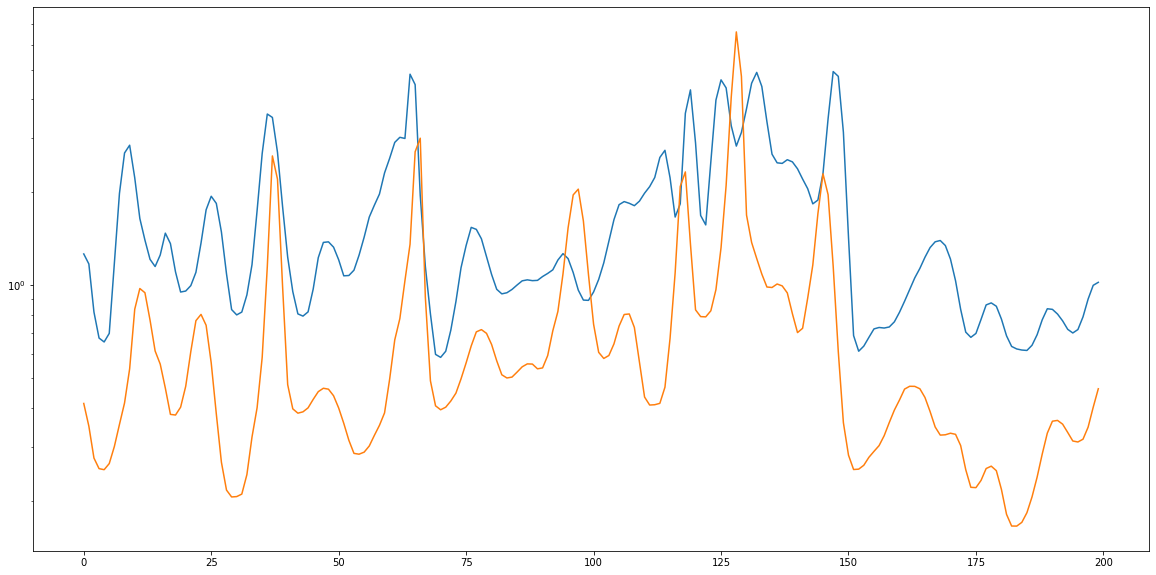

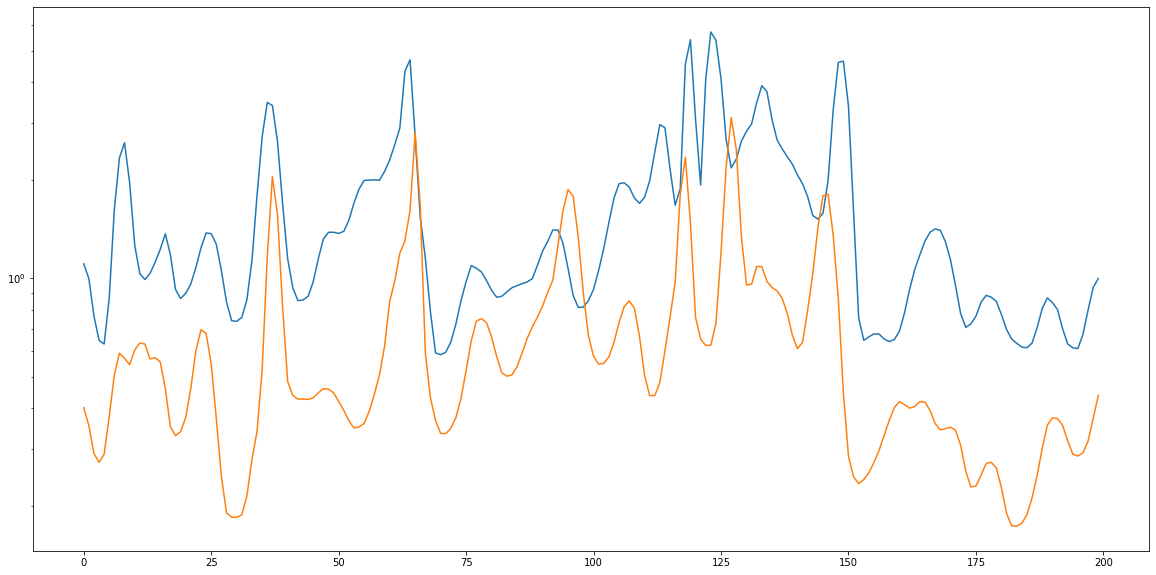

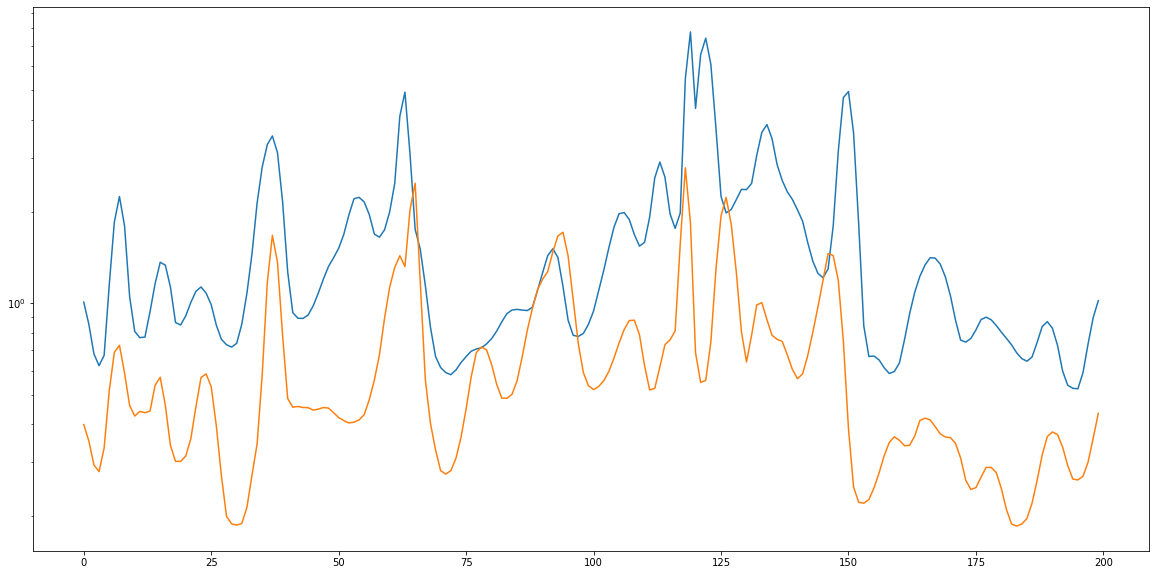

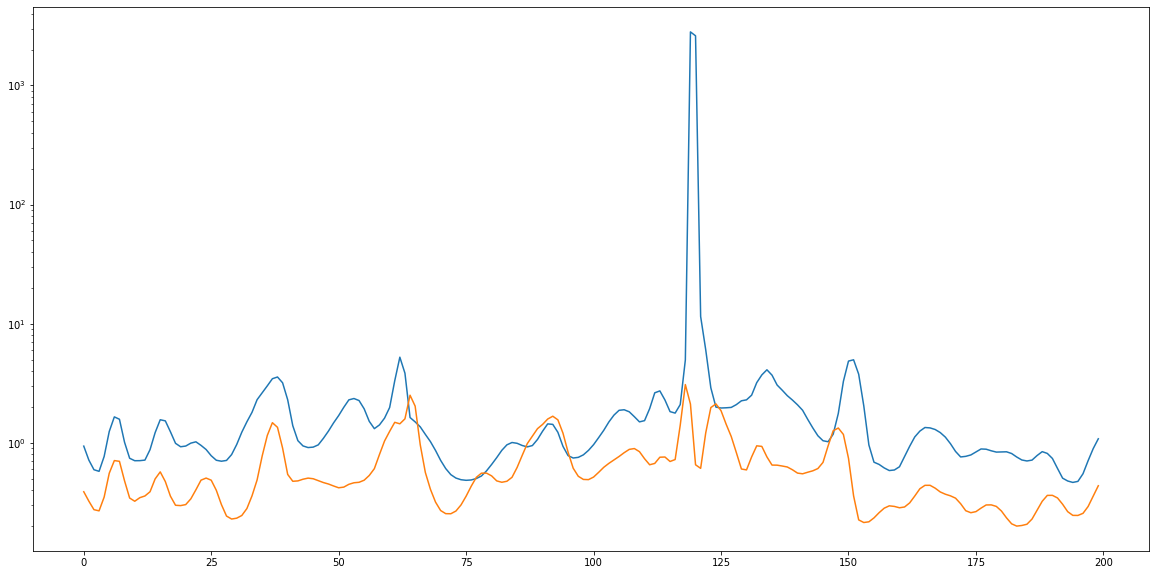

In [30]:
for i in range(10):
    plt.figure(figsize =(20, 10))
    plt.plot(xHI[0, i, :200]*10**4)
    plt.plot(delta[0, i, :200])
    plt.yscale('log')

In [31]:
"""
# %load "/fs/lustre/cita/hqchen/data/scripts/draw_los_well_centered.py"
import array
import h5py
import numpy as np
import glob
import matplotlib.pyplot as plt 
import yt
#from pyfrit import ifritfunc
from astropy.cosmology import WMAP9 as cosmo
from scipy.interpolate import interp1d

h100=0.6814
auni_scale=np.loadtxt("/fs/lustre/cita/hqchen/data/auni_abox.txt")
func=interp1d(auni_scale[:,0],auni_scale[:,1])

def random_direction(nlos=10):
    normalrandom=np.random.normal(loc=0,scale=1,size=30*nlos).reshape(3,10*nlos)

    # print( normalrandom,np.shape(normalrandom))
    X=normalrandom[0]
    Y=normalrandom[1]
    Z=normalrandom[2]
    L=(X**2+Y**2+Z**2)**0.5
    X=X[L>0.01][:nlos]
    Y=Y[L>0.01][:nlos]
    Z=Z[L>0.01][:nlos]
    L=L[L>0.01][:nlos]
    return X/L,Y/L,Z/L

N=1024
boxCHIMP=40
ncells=1024

hlist=glob.glob("/data/gnedin/REI/D/Cai.B40.N256L2.sf=1_uv=0.15_bw=10_res=100.WC1/F/rscor/hlists/*.list")
hlist_alist=[float(s.split("hlist_")[-1].split(".list")[0]) for s in hlist]
hlist_alist=np.array(hlist_alist)

abinArr,xHIvArr=np.loadtxt("F_rei_hist.txt",unpack=True)

for abin in abinArr:
    auni=abin
    # find closest catalog
    index=np.argmin(np.abs(hlist_alist-auni))
    fname=hlist[index]
    print(auni,fname)
    print(fname)
    hc=np.loadtxt(fname,usecols=[0,1,5,29,10,11,12,16,17,18,19,20,21,22,26,35,33])
    auni=hc[0,0]
    scale=func(auni)      
    print(1/scale)
    halo_X=hc[:,8]*scale
    halo_Y=hc[:,9]*scale
    halo_Z=hc[:,10]*scale
    halo_ID=np.array(hc[:,1],dtype=int)
    Mvir=hc[:,4]/h100
    print(max(halo_X))

    filt=Mvir>np.sort(Mvir)[-1001]


    # load uniform grid
    binName="z-ifrit-a=0.1401.bin".format(abin)
    with open(binName,'rb') as f:
        binarydata=f.read()
    lllen=8; flen=4; ilen=4 

    firstfield=lllen*2+3*ilen

    nextfield=firstfield

    xHI=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])
    xHI=np.reshape(xHI,(N,N,N),order='F')

    nextfield+=lllen+N**3*flen
    god=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])
    god=np.reshape(god,(N,N,N),order='F')


    nextfield+=lllen+N**3*flen
    T=array.array('f',binarydata[nextfield+lllen:nextfield+lllen+N**3*flen])
    T=np.reshape(T,(N,N,N),order='F')
    argmin=np.argmin(np.abs(hlist_alist-abin))


    losh5=h5py.File("5xtop1000_new_los_a{:6.4f}.h5".format(abin),"w")
    for ind in range(np.sum(filt)):
        
        grp=losh5.create_group("haloID_"+str(halo_ID[filt][ind]))
         
        spoint=np.array([halo_X[filt][ind],halo_Y[filt][ind],halo_Z[filt][ind]]) #CHIMP
        length=200
        dl_code=0.25
        spoint_code=spoint/40.*ncells
        length_code=length/40.*ncells
        npix=int(length_code/dl_code)
        
        dirxArr,diryArr,dirzArr=random_direction(5)
        cnt=0
        for dirx,diry,dirz in zip(dirxArr,diryArr,dirzArr):
            subgrp=grp.create_group("los_"+str(cnt))
            
            losVec=np.array([dirx,diry,dirz])
    
            dx_code,dy_code,dz_code=dl_code*losVec
    
            xarr_code=spoint_code[0]+np.arange(npix)*dx_code
            yarr_code=spoint_code[0]+np.arange(npix)*dy_code
            zarr_code=spoint_code[0]+np.arange(npix)*dz_code
    
            ix=np.array(np.floor(xarr_code%ncells),dtype=int)
            iy=np.array(np.floor(yarr_code%ncells),dtype=int)
            iz=np.array(np.floor(zarr_code%ncells),dtype=int)
            
            subgrp.create_dataset("xHI",data=xHI[ix,iy,iz])
            subgrp.create_dataset("god",data=god[ix,iy,iz])
            subgrp.create_dataset("T",data=T[ix,iy,iz])
                                  
                                  
            cnt+=1
    losh5.close()
"""

'\n# %load "/fs/lustre/cita/hqchen/data/scripts/draw_los_well_centered.py"\nimport array\nimport h5py\nimport numpy as np\nimport glob\nimport matplotlib.pyplot as plt \nimport yt\n#from pyfrit import ifritfunc\nfrom astropy.cosmology import WMAP9 as cosmo\nfrom scipy.interpolate import interp1d\n\nh100=0.6814\nauni_scale=np.loadtxt("/fs/lustre/cita/hqchen/data/auni_abox.txt")\nfunc=interp1d(auni_scale[:,0],auni_scale[:,1])\n\ndef random_direction(nlos=10):\n    normalrandom=np.random.normal(loc=0,scale=1,size=30*nlos).reshape(3,10*nlos)\n\n    # print( normalrandom,np.shape(normalrandom))\n    X=normalrandom[0]\n    Y=normalrandom[1]\n    Z=normalrandom[2]\n    L=(X**2+Y**2+Z**2)**0.5\n    X=X[L>0.01][:nlos]\n    Y=Y[L>0.01][:nlos]\n    Z=Z[L>0.01][:nlos]\n    L=L[L>0.01][:nlos]\n    return X/L,Y/L,Z/L\n\nN=1024\nboxCHIMP=40\nncells=1024\n\nhlist=glob.glob("/data/gnedin/REI/D/Cai.B40.N256L2.sf=1_uv=0.15_bw=10_res=100.WC1/F/rscor/hlists/*.list")\nhlist_alist=[float(s.split("hlist_")[-1

## Solving the photoionization equation

In [16]:
#Importing the relevant modules. 
from sympy import * 
from scipy.integrate import quad

In [18]:

alpha_nu_red = -0.61
alpha_nu_blue = -1.7

M1450 = -26.4 #Assuming that the quasar has this absolute magnitude.


f_nu=lambda mAB: 10**(-(mAB+48.6)/2.5)
pc2cm=3.086e+18
MagAB_to_Lnu=lambda MagAB: 4*np.pi*(10*pc2cm)**2*f_nu(MagAB) # in unit erg s^-1 Hz^-1
lght=2.99792458e10
nuHz_to_lambdaAA=lambda nuHz:1e8*lght/nuHz
lambdaAA_to_nuHz=lambda lambdaAA: lght/(1e-8*lambdaAA)

nu1450=lambdaAA_to_nuHz(1450)
MagAB_to_nuLnu=lambda MagAB:nu1450*MagAB_to_Lnu(MagAB)
MagAB_to_Liso =lambda MagAB:10**(4.74+0.91*np.log10(MagAB_to_nuLnu(MagAB)))


nu912=lambdaAA_to_nuHz(912)
nu_lo=lambdaAA_to_nuHz(10000) #1 mu m
nu_hi=lambdaAA_to_nuHz(1.5) # 8 keV

def Lum_nu_spec(nu, L_at_nu0, nu0, alpha_nu):
    return L_at_nu0*(nu/nu0)**alpha_nu

def calc_Lbol(L_nu_at912,alpha_nu_red,alpha_nu_blue):
    red=quad(Lum_nu_spec,nu_lo,lambdaAA_to_nuHz(912),args=(L_nu_at912,lambdaAA_to_nuHz(912),alpha_nu_red))[0]
    blue=quad(Lum_nu_spec,lambdaAA_to_nuHz(912),nu_hi,args=(L_nu_at912,lambdaAA_to_nuHz(912),alpha_nu_blue))[0]
    return red+blue

L_nu_at912 = MagAB_to_Liso(M1450)/calc_Lbol(1,alpha_nu_red,alpha_nu_blue)* (u.erg) * (u.s)**(-1) * (u.Hz)**(-1)

In [111]:
#Importing the relevant constants
from astropy.constants import h
from astropy.constants import k_B
from astropy. constants import c



L1450 = 4*np.pi*(10*3.086e+18)**2*10**(-(M1450+48.6)/2.5)* u.erg * (u.s)**(-1) * (u.Hz)**(-1)
#Refer to Lusso et al. (2015) for a derivation and Satyavolu et al. (2023) for an example. 

c = c.to(u.cm* (u.s)**(-1)) #Converting the speed of light to cgs units

def nu_to_lamb(nu):
    """ 
    A function to convert frequency to wavelength for electromagnetic radiation. 
    Parameters
    ----------
    nu: float64, represents the frequency of the light.
    """
    nu = nu*(u.s)**(-1) #Converting the numerical frequency to one with units
    return (c/nu).to(u.AA) #Converting the wavelength to angstroms and outputting the result

def lamb_to_nu(lamb):
    """ 
    A function to convert wavelength to frequency for electromagnetic radiation. 
    Parameters
    ----------
    lamb: float64, represents the wavelength of the light.
    """
    lamb = lamb*u.AA #Converting the numerical wavelength to one with units
    lamb = lamb.to(u.cm) #Converting angstroms to centimetres
    return c/lamb #Outputting the result

def L_nu(nu):
    """ 
    A function to obtain the luminosity of the quasar at a partiular frequency of light
    Parameters
    ----------
    nu: float64, represents the wavelength of the light.
    """
    lamb = nu_to_lamb(nu)
    
    if lamb.value >= 912:
        exponent = -0.61
    
    else:
        exponent = -1.7
        
    cns_frq = lamb_to_nu(912)
    K1 = L_nu_at912 /((cns_freq.value**(exponent))*(u.s)**(-1))
    L = K1*((nu)**(exponent))*(u.s)**(-1) 
    return L 

cns_freq = lamb_to_nu(912) #Obtaining the frequency for a wavelength of 912 angstroms

K2 = L_nu_at912/((cns_freq.value**(-1.7))*(u.s)**(-1)) #Obtaining a constant of proportionality


In [112]:
#Quick check to make sure that the above functions produce the desired results

wvlngth = nu_to_lamb(10)
print(wvlngth)

print(lamb_to_nu(wvlngth.value))
#Works

print(L_nu(lamb_to_nu(912).value))
print(L_nu_at912)
#Works

2.9979245799999994e+17 Angstrom
10.0 1 / s
1.1962530126828624e+31 erg / (Hz s)
1.1962530126828624e+31 erg / (Hz s)


In [113]:
#Converting all of the constants to the desired units

h = h.to(u.eV*u.s)

temp = 1e4*u.K # Here we will be assuming that the IGM is thermally homogeneous and has a temperature of 1e+4 K 
temp = ((temp*k_B).to(u.eV))

v0 = ((13.6*u.eV)/h) #This is the threshold frequency for the ionization of hydrogen

print(h, temp, nu_to_lamb(v0.value)) #Checking if the constants make sense 

4.135667696923859e-15 eV s 0.8617333262145178 eV 911.6485178911784 Angstrom


In [114]:
print(L(lamb_to_nu(912)))
print(L_nu_at912.to(u.eV * (u.Hz)**(-1)*(u.s)**(-1)))

7.466424034011114e+42 eV / (Hz s)
7.466424034011114e+42 eV / (Hz s)


In [224]:
#In this block of code, we will be testing everything for a single sight-line. An analysis of multiple sight-lines 
#will be looked at in the next block of code. 

#Importing the relevant symbols required to solve the ODE from sympy
from sympy.abc import v, t
#Throughout this section of code we will use 'v' to represent the frequency of EM radiation and 't' to represent time
from scipy.integrate import romberg

x = symbols('x', cls = Function) 
#Throughout this section of code x will represent the function for the neutral fraction of hydrogen.

K2 = K2.to(u.eV * (u.Hz)**(-1))
#We will solve the photoionization equation for 1 cell in 10 random sight-lines

direction = np.array((np.random.randint(0, 1023), np.random.randint(0, 1023), np.random.randint(0, 1023)))
direction = direction/(np.linalg.norm(direction))
#Generating a random direction for the sight-line. Observe that the distribution of the direction
#vector is not spherically symmetric 

lls, lls_trunc, sight, new_sight = lyman(start[19], direction)
#Obtaining the information about the cells along the line of sight

a = lambda v :  6.30*10**(-18)*(1.34*(v/3288465369235488.5)**(-2.99) - 0.34*(v/3288465369235488.5)**(-3.99))
#a = lambda v :  6.30*10**(-18)*(1.34*(v/v0.value)**(-2.99) - 0.34*(v/v0.value)**(-3.99))
#Throughout this section of code 'a' represents the photoionization cross-section from HI to HII
#and has units of cm^2

#L = lambda v :  (K2*((v.value)**(-1.7))*(u.s)**(-1)).to(u.eV * (u.Hz)**(-1) *(u.s)**(-1))
L = lambda v :  (K2.value*((v)**(-1.7)))
#L = lambda v :  (K2.value*((v)**(-1.7)))
#Function for obtaining luminosity of the quasar at a particular frequency in eV/(Hz s)

def integrand(v,r):
        '''
        A function to return the integrand that is involved in the calculation of Gamma
        Parameters
        ----------
        v : float64 represents the frequency of the EM radiation
        '''
        return ((L(v)/(4*np.pi*((r)**2)*4.135667696923859e-15*v))*a(v))
    #Observe that the integrand the desired units as integrating over frequency will get rid of Hz, leaving
    #Gamma to have units of s^(-1) as desired. 

    

Distance = []
Gamma = []
for i in range(len(sight)):
    r = np.linalg.norm(sight[i] - start[19])/m
    Distance.append(r)
    #We will store the distance to the cells 
    r = r * u.Mpc 
    r = r.to(u.cm)
    #Converting the distance to centimetres for calculation of gamma
    gamma = quad(integrand, 3288465369235488.5, 1e17, args = (r.value))[0] 
    Gamma.append(gamma)


print(K2)


1.7853222627282522e+69 eV / Hz


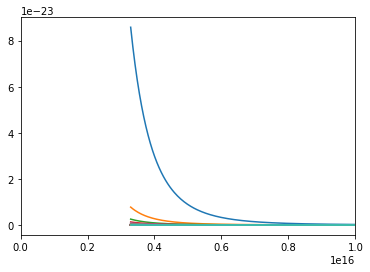

In [181]:
for i in range(len(sight)):
    r = np.linalg.norm(sight[i] - start[19])/m
    Distance.append(r)
    #We will store the distance to the cells 
    r = r * u.Mpc 
    r = r.to(u.cm)

    time = np.linspace(3288465369235488.5, 3288465369235488.5e+2, 10000)

    plt.plot(time, integrand(time, r.value))
    plt.xlim(0, 1e16)

Text(0, 0.5, 'log$(\\Gamma\\ [s^{-1}])$')

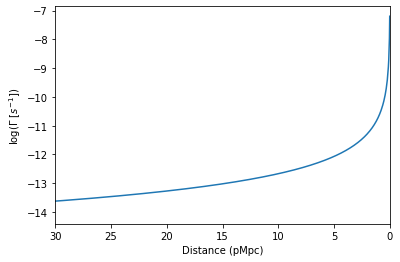

In [211]:
#Here we will plot Gamma as a function of distance from the quasar
plt.plot(Distance, np.log10(Gamma))
plt.xlim([30, 0])
plt.xlabel('Distance (pMpc)')
plt.ylabel('log$(\Gamma\ [s^{-1}])$')

In [190]:
alpha = exp(-28.6130338 - 0.72411256*ln(temp.value) 
                - 2.02604473*10**(-2)*ln(temp.value)**2 
                - 2.38086188*10**(-3)*ln(temp.value)**3
                - 3.21260521*10**(-4)*ln(temp.value)**4
                - 1.42150291*10**(-5)*ln(temp.value)**5
                + 4.98910892*10**(-6)*ln(temp.value)**6
                + 5.75561414*10**(-7)*ln(temp.value)**7
                - 1.85676704*10**(-8)* ln(temp.value)**8
                - 3.07113524*10**(-9)*ln(temp.value)**9)* (u.cm)**3 * (u.s)**(-1)
#Throughout this section, alpha will represent the recombination rate and it has units of cm^3/s
print(alpha)

4.16987566019461e-13 cm3 / s


In [209]:
print(Gamma[100])
#Choosing a random value of gamma along the LOS that fits the values we expect it to near the quasar

8.57000681372913e-13
6.335014966970642e-08
1.2


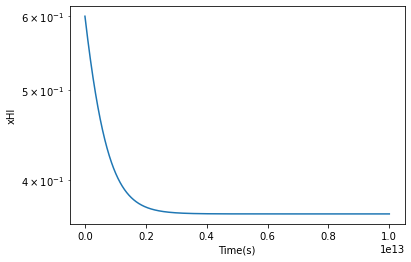

In [222]:
#Solving the photoionization equation for some randomly chosen values of xHI and n_e
import scipy
xHI_0 = 0.6
n = 1.897 * (u.cm)**(-3)


def model(x, t):
    """ 
    A function to model the ode that we intend to solve
    Parameters
    ----------
    x: float64, represents the neutral hydrogen fraction
    t: float64, represents the time
    """
    dxdt = - Gamma[100] * x + alpha.value * n.value*(1-x)**2
    return np.float64(dxdt)

t = np.linspace(0, 1e13, 10000000)
#We will work in a time space of 50 seconds. Where we take the initial state of the system to start at t = 0

sol = scipy.integrate.odeint(model, xHI_0 , t)
#Solving the ODE

plt.plot(t, sol)
plt.xlabel('Time(s)')
plt.ylabel('xHI')
plt.yscale('log')

4.16987566019461e-13


/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


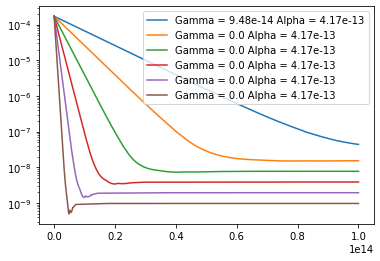

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


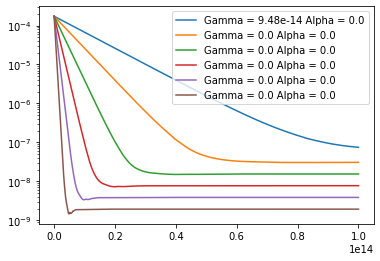

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


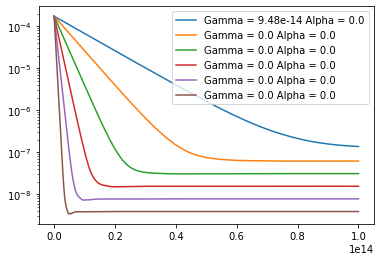

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


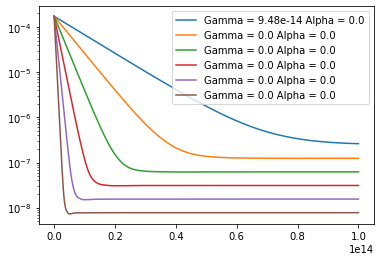

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


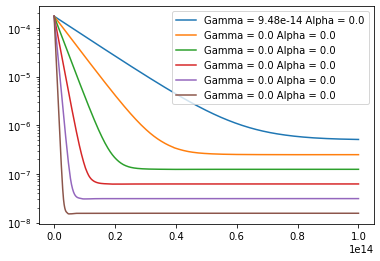

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


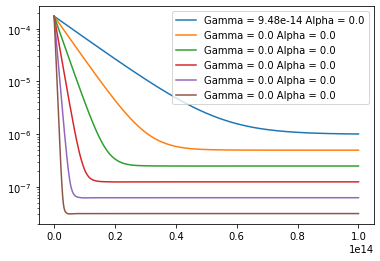

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


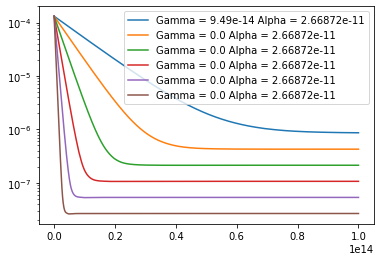

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


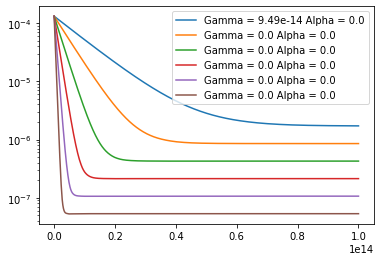

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


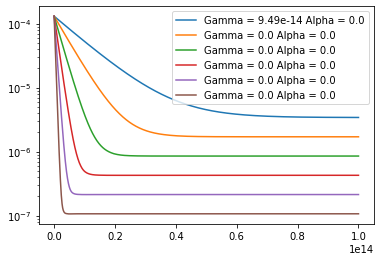

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


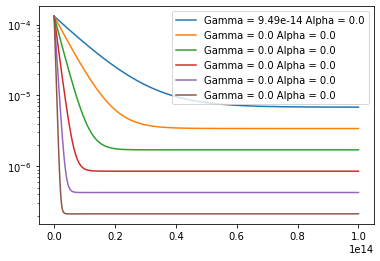

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


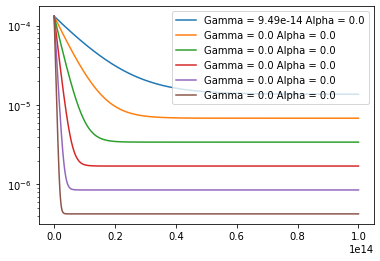

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


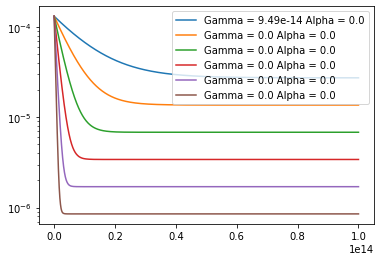

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


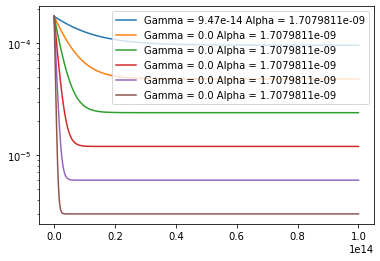

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


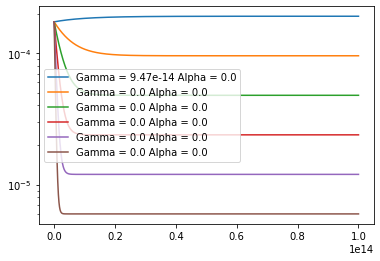

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


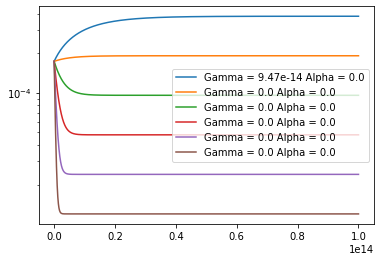

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


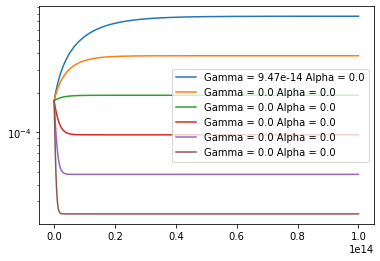

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


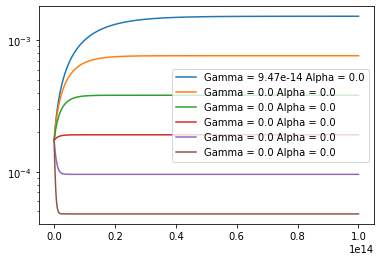

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


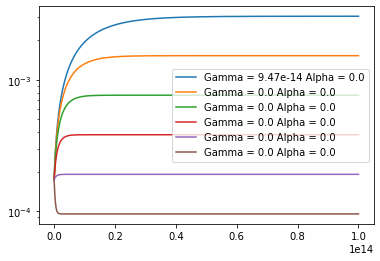

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


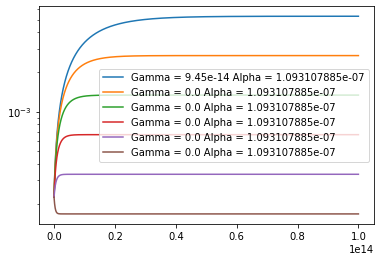

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


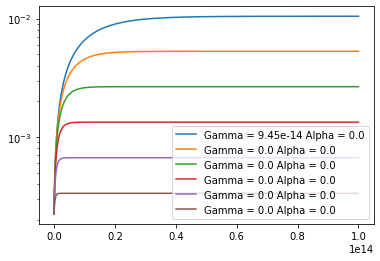

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


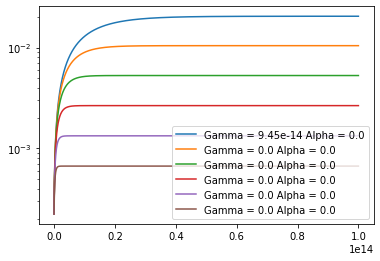

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


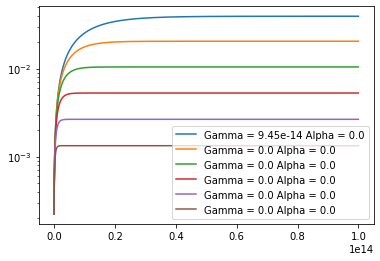

/cita/modules/python/3.10.2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


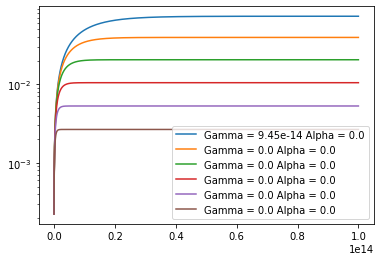

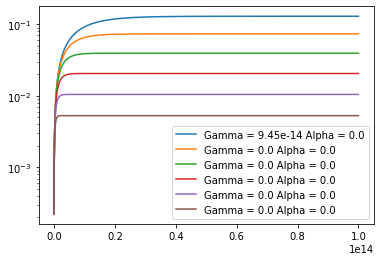

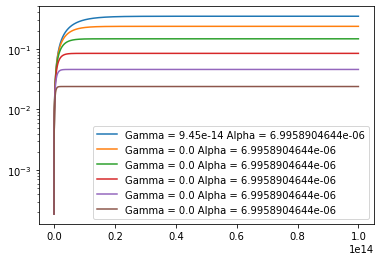

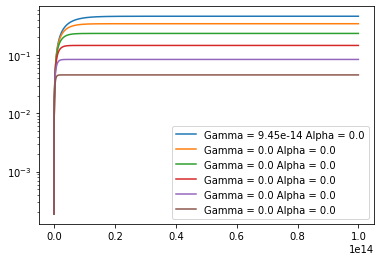

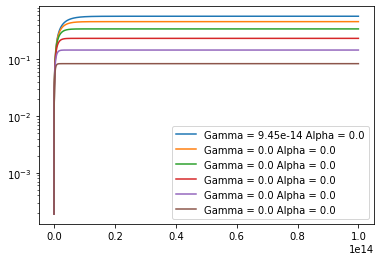

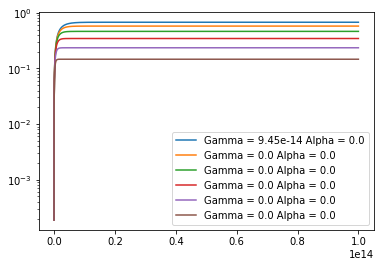

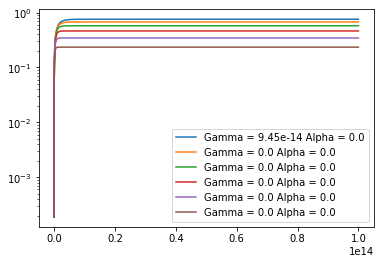

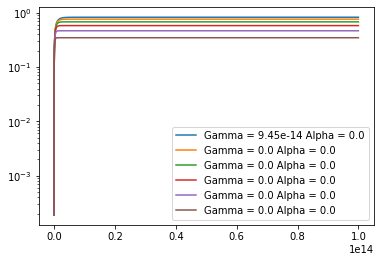

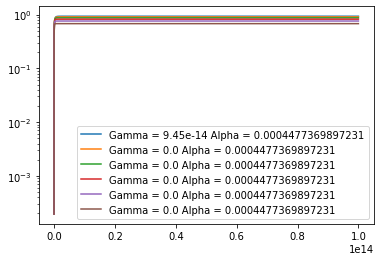

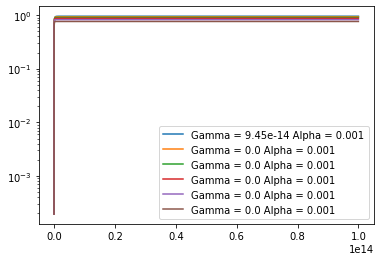

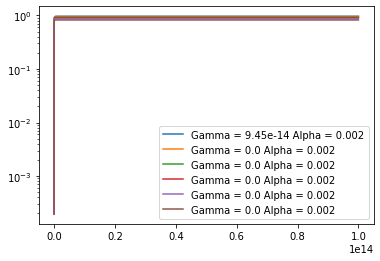

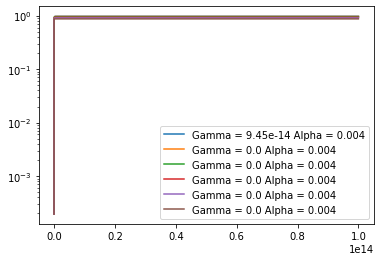

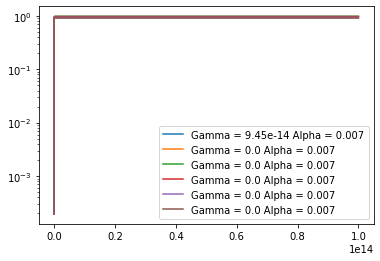

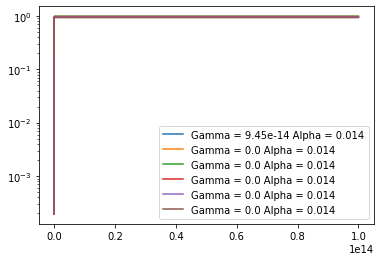

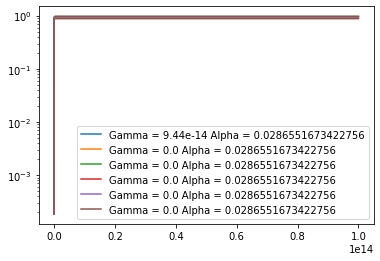

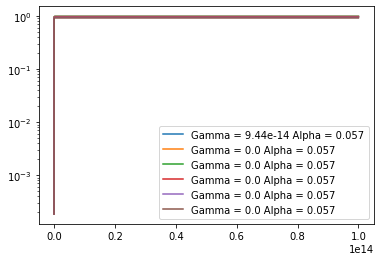

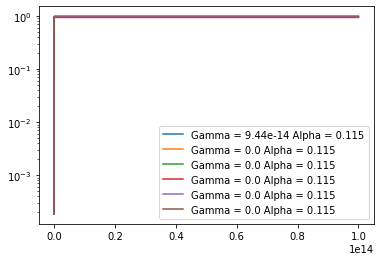

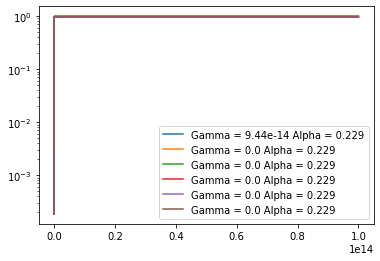

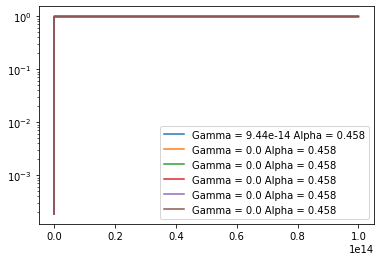

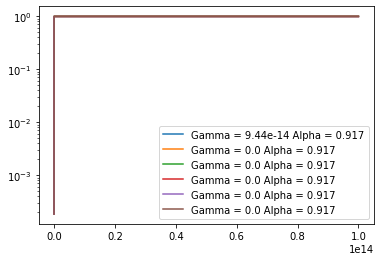

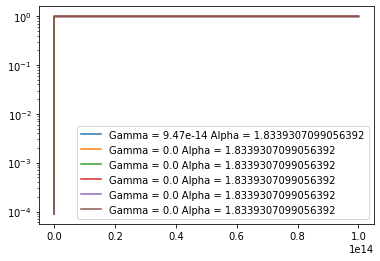

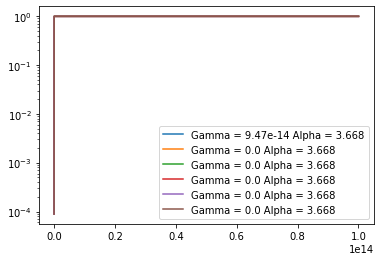

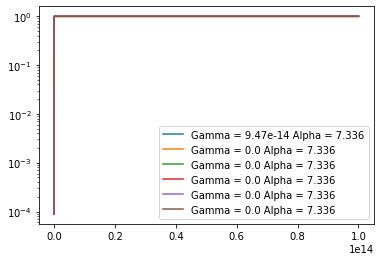

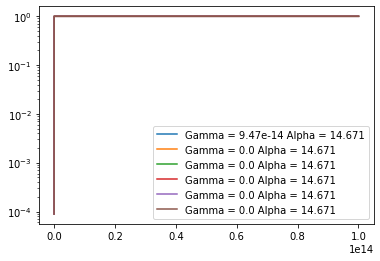

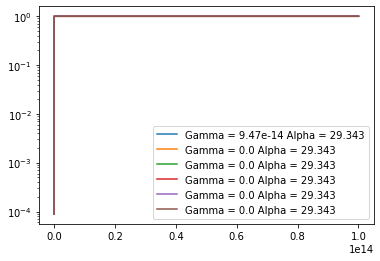

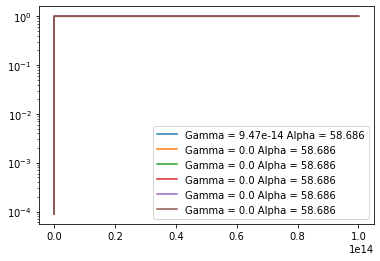

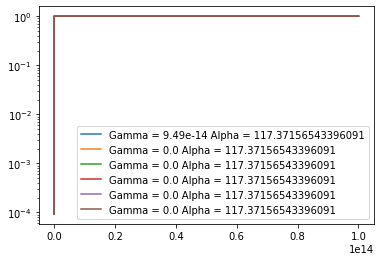

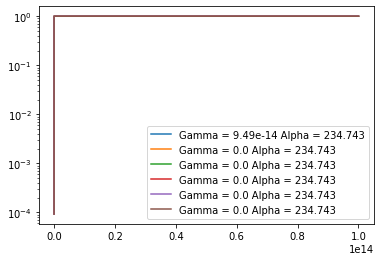

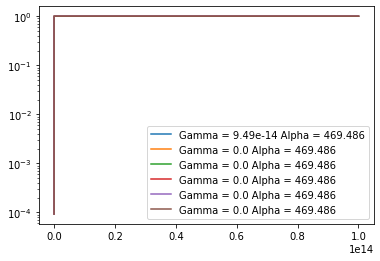

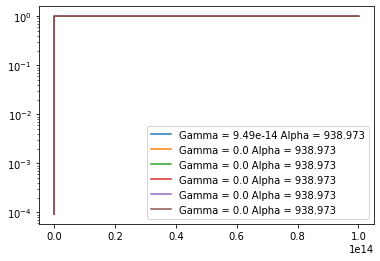

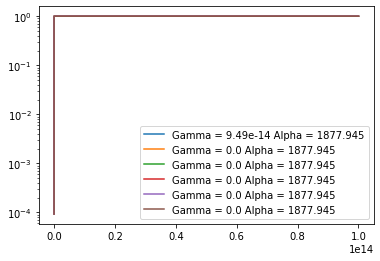

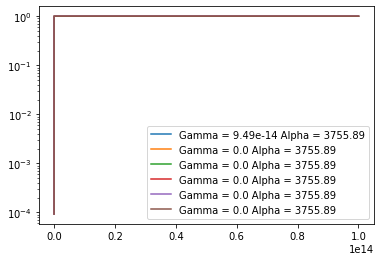

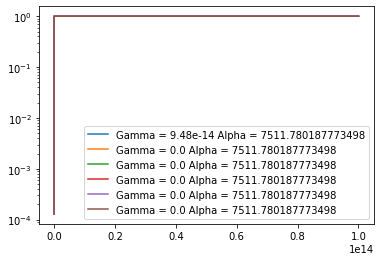

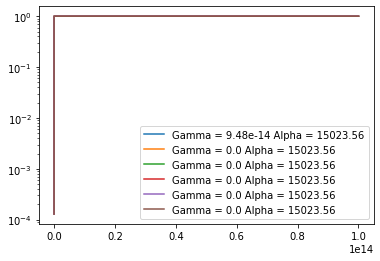

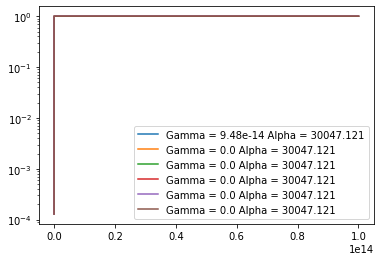

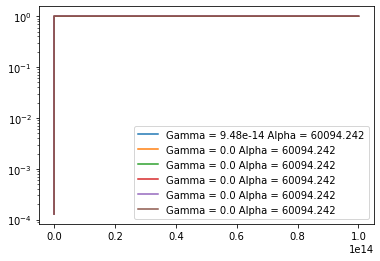

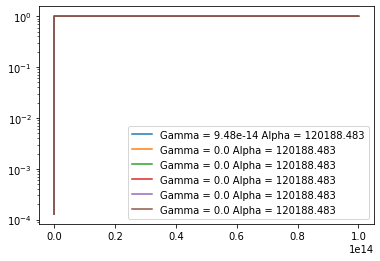

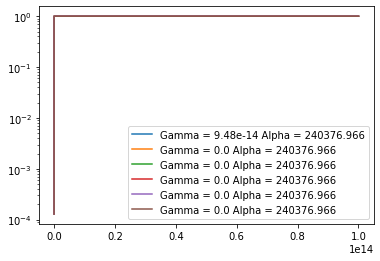

In [265]:
alph_val = alpha.value
print(alph_val)

#We will solve the photoionization equation for 1 cell in 10 random sight-lines
for j in range(10):
    direction = np.array((np.random.randint(0, 1023), np.random.randint(0, 1023), np.random.randint(0, 1023)))
    direction = direction/(np.linalg.norm(direction))
    #Generating a random direction for the sight-line. Observe that the distribution of the direction
    #vector is not spherically symmetric 
    lls, lls_trunc, sight, new_sight = lyman(start[19], direction)
    #Obtaining the information about the cells along the line of sight
    
    #Observe that the integrand has the desired units as integrating over frequency will get rid of Hz, leaving
    #Gamma to have units of s^(-1) as desired. 

    
    n_e = np.zeros(len(sight))
    #tau_sight = np.zeros(len(sight))
    for i in range (len(sight)):
        n_e[i] = nHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]].value*(1 - xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]])
        #Here, we obtain the number density of electrons along the line of sight
        #tau_sight[i] = dT[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]].value*(1 - xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]])
    
    # We will only solve the photoionization equation for the cell that is closest to the quasar
       # We will only solve the photoionization equation for the cell that is closest to the quasar
    
    for k in range(1):
        n = n_e[300]
        r = np.linalg.norm(sight[300] - start[19])/m
        r = r * u.Mpc 
        r = r.to(u.cm)
        #tau = tau_sight[k]
        
        #gamma = quad(integrand, v0.value, 1e16, args = (r.value))[0]


        def model(x, t):
            dxdt = - gamma * x + alph_val * n*(1-x)**2
            return np.float64(dxdt)
        for cnt_rnd in range(6):
            gamma = quad(integrand, v0.value, 1e16, args = (r.value))[0]
            rnd_num1 = 3
            if cnt_rnd == 0 and round(alph_val, 12)!= 1:
                rnd_num1 = 16
            for l in range(6):

                def model(x, t):
                    dxdt = - gamma * x + alph_val * n*(1-x)**2
                    return np.float64(dxdt)
                t = np.linspace(0, 1e14, 10000000)
    
                sol = scipy.integrate.odeint(model, xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]] , t)
                #print(dsolve(diff(x(t), t) + gamma*x(t)-alpha*n*(1-x(t))**2, x(t)))
                rnd_num2 = 3
                
                if l == 0:
                    rnd_num2 = 16
                

                plt.plot(t, sol, label = "Gamma = " + str((round(gamma, rnd_num2))) + " Alpha = " + str(round(alph_val, rnd_num1) )  )
                plt.legend()
                plt.yscale('log')
                gamma = gamma * 2
            plt.show()
            alph_val = alph_val * 2

In [319]:
# Here, we will repeat the same procedure as above for a couuple of sight lines and different values of gamma
# and alpha

'''
#We will solve the photoionization equation for 1 cell in 10 random sight-lines
for j in range(10):
    print("here")
    direction = np.array((np.random.randint(0, 1023), np.random.randint(0, 1023), np.random.randint(0, 1023)))
    direction = direction/(np.linalg.norm(direction))
    #Generating a random direction for the sight-line. Observe that the distribution of the direction
    #vector is not spherically symmetric 
    
    lls, lls_trunc, sight, new_sight = lyman(start[19], direction)
    #Obtaining the information about the cells along the line of sight
    
    #Observe that the integrand has the desired units as integrating over frequency will get rid of Hz, leaving
    #Gamma to have units of s^(-1) as desired. 

    
    n_e = np.zeros(len(sight))
    #tau_sight = np.zeros(len(sight))
    for i in range (len(sight)):
        n_e[i] = nHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]].value*(1 - xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]])
        #Here, we obtain the number density of electrons along the line of sight
        #tau_sight[i] = dT[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]].value*(1 - xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]])
    
    # We will only solve the photoionization equation for the cell that is closest to the quasar
    
    for k in range(1):
        n = n_e[300]
        r = np.linalg.norm(sight[300] - start[19])/m
        r = r * u.Mpc 
        r = r.to(u.cm)
        #tau = tau_sight[k]
        
        #gamma = quad(integrand, v0.value, 1e16, args = (r.value))[0]


        def model(x, t):
            dxdt = - gamma * x + alph_val * n*(1-x)**2
            return np.float64(dxdt)
 
        t = np.linspace(0, 0.2e15, 10000000)

        sol = scipy.integrate.odeint(model, xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]] , t)
        #print(dsolve(diff(x(t), t) + gamma*x(t)-alpha*n*(1-x(t))**2, x(t)))
        rnd_num2 = 16
        


        
        
        plt.plot(t, sol, label = "Gamma = " + str((round(gamma, rnd_num2))) + " Alpha = " + str(round(alph_val, rnd_num1) )  )
        plt.yscale('log')
        plt.show()
 
        print('here')
        for cnt_rnd in range(1):
            print(cnt_rnd)
            gamma = quad(integrand, v0.value, 1e16, args = (r.value))[0]
            print(cnt_rnd)
       
            plt.figure(figsize = (20, 10))
            rnd_num1 = 3
            if cnt_rnd == 0 and round(alph_val, 12)!= 1:
                rnd_num1 = 16
            
            for l in range(6):

                def model(x, t):
                    dxdt = - gamma * x + alph_val * n*(1-x)**2
                    return np.float64(dxdt)
                t = np.linspace(0, 1e14 10000000)
    
                sol = scipy.integrate.odeint(model, xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]] , t)
                #print(dsolve(diff(x(t), t) + gamma*x(t)-alpha*n*(1-x(t))**2, x(t)))
                rnd_num2 = 3
                
                if l == 0:
                    rnd_num2 = 16

                plt.plot(t, sol, label = "Gamma = " + str((round(gamma, rnd_num2))) + " Alpha = " + str(round(alph_val, rnd_num1) )  )
                plt.legend()
                plt.yscale('log')
                gamma += 0.2 
            plt.show()
            alph_val += 0.2
'''       

'\n#We will solve the photoionization equation for 1 cell in 10 random sight-lines\nfor j in range(10):\n    print("here")\n    direction = np.array((np.random.randint(0, 1023), np.random.randint(0, 1023), np.random.randint(0, 1023)))\n    direction = direction/(np.linalg.norm(direction))\n    #Generating a random direction for the sight-line. Observe that the distribution of the direction\n    #vector is not spherically symmetric \n    \n    lls, lls_trunc, sight, new_sight = lyman(start[19], direction)\n    #Obtaining the information about the cells along the line of sight\n    \n    #Observe that the integrand has the desired units as integrating over frequency will get rid of Hz, leaving\n    #Gamma to have units of s^(-1) as desired. \n\n    \n    n_e = np.zeros(len(sight))\n    #tau_sight = np.zeros(len(sight))\n    for i in range (len(sight)):\n        n_e[i] = nHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]].value*(1 - xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]

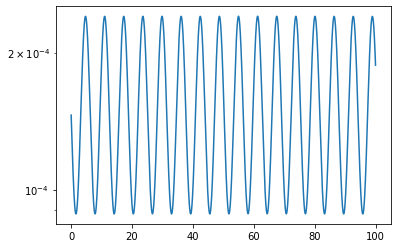

In [350]:
#Here, we will solve the photoionization equation for Gamma that is periodic. 
gamma =  lambda t : 0.5*np.cos(t)
alph_val = alpha.value

for j in range(1):
    direction = np.array((np.random.randint(0, 1023), np.random.randint(0, 1023), np.random.randint(0, 1023)))
    direction = direction/(np.linalg.norm(direction))
    #Generating a random direction for the sight-line. Observe that the distribution of the direction
    #vector is not spherically symmetric 
    lls, lls_trunc, sight, new_sight = lyman(start[19], direction)
    #Obtaining the information about the cells along the line of sight
    
    #Observe that the integrand has the desired units as integrating over frequency will get rid of Hz, leaving
    #Gamma to have units of s^(-1) as desired. 

    
    n_e = np.zeros(len(sight))
    #tau_sight = np.zeros(len(sight))
    for i in range (len(sight)):
        n_e[i] = nHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]].value*(1 - xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]])
        #Here, we obtain the number density of electrons along the line of sight
        #tau_sight[i] = dT[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]].value*(1 - xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]])
    
    # We will only solve the photoionization equation for the cell that is closest to the quasar
       # We will only solve the photoionization equation for the cell that is closest to the quasar
    
    for k in range(1):
        n = n_e[300]
        r = np.linalg.norm(sight[300] - start[19])/m
        r = r * u.Mpc 
        r = r.to(u.cm)
        #tau = tau_sight[k]
        
        #gamma = quad(integrand, v0.value, 1e16, args = (r.value))[0]
    
        def model(x, t):
            dxdt = - gamma(t) * x + alph_val * n*(1-x)**2
            return np.float64(dxdt)
        t = np.linspace(0, 1e2, 10000000)

        sol = scipy.integrate.odeint(model, xHI[new_sight[i][0]][new_sight[i][1]][new_sight[i][2]] , t)
        #print(dsolve(diff(x(t), t) + gamma*x(t)-alpha*n*(1-x(t))**2, x(t)))
        rnd_num2 = 3

        if l == 0:
            rnd_num2 = 16


        plt.plot(t, sol)
        plt.yscale('log')
        plt.show()

In [347]:
print(gamma)
print(alpha)

<function <lambda> at 0x7fe9d7e41cf0>
4.16987566019461e-13 cm3 / s


## Using results from the 1DRT code 

['/fs/lustre/cita/akhadir/run_sims/test_1.00e+05yr.txt', '/fs/lustre/cita/akhadir/run_sims/test_3.00e+07yr.txt', '/fs/lustre/cita/akhadir/run_sims/test_3.00e+06yr.txt', '/fs/lustre/cita/akhadir/run_sims/test_3.00e+05yr.txt', '/fs/lustre/cita/akhadir/run_sims/test_1.00e+07yr.txt', '/fs/lustre/cita/akhadir/run_sims/test_1.00e+06yr.txt']


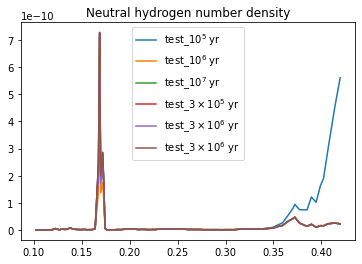

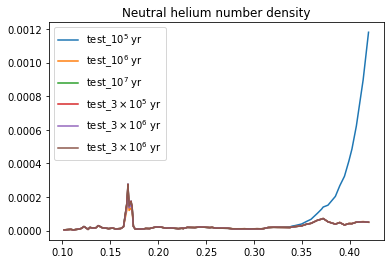

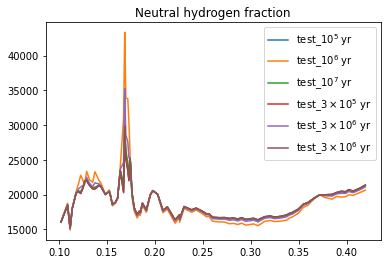

In [318]:
#Importing glob to read the files
from glob import glob

#Loading the data 
fpath = "/fs/lustre/cita/akhadir/run_sims/"

files = glob(fpath + '*test*.txt')
print(files)

tot_thick = []
tot_nH = []
tot_nHe = []
tot_xHI = []

for i in range(len(files)):
    file = files[i]
    f_dist, f_thick, f_nH, f_nHe, f_xHI = np.loadtxt(file, unpack = True)
    tot_thick.extend(np.ndarray.tolist(f_thick))
    tot_nH.extend(np.ndarray.tolist(f_nH))
    tot_nHe.extend(np.ndarray.tolist(f_nHe))
    tot_xHI.extend(np.ndarray.tolist(f_xHI))
    

for i in range(int(len(tot_nH)/len(f_nH))):
    t = "test_"
    if i == 0:
        l = t + "$10^5$ yr"
    elif i == 1:
        l = t + "$10^6$ yr"
    elif i == 2:
        l = t + "$10^7$ yr"
    elif i == 3:
        l = t + "$3 \\times 10^5$ yr"
    elif i == 4:
        l = t + "$3 \\times 10^6$ yr"
    else:
        l = t + "$3 \\times 10^6$ yr"
    plt.plot(f_dist, tot_nH[i*len(f_nH) : (i+1)*len(f_nH)], label = l)
    plt.legend()
    plt.title('Neutral hydrogen number density')
plt.show()

for i in range(int(len(tot_nH)/len(f_nH))):
    if i == 0:
        l = t + "$10^5$ yr"
    elif i == 1:
        l = t + "$10^6$ yr"
    elif i == 2:
        l = t + "$10^7$ yr"
    elif i == 3:
        l = t + "$3 \\times 10^5$ yr"
    elif i == 4:
        l = t + "$3 \\times 10^6$ yr"
    else:
        l = t + "$3 \\times 10^6$ yr"
    plt.plot(f_dist, tot_nHe[i*len(f_nH) : (i+1)*len(f_nH)], label = l)
    plt.legend()
    plt.title('Neutral helium number density')
plt.show()

for i in range(int(len(tot_nH)/len(f_nH))):
    if i == 0:
        l = t + "$10^5$ yr"
    elif i == 1:
        l = t + "$10^6$ yr"
    elif i == 2:
        l = t + "$10^7$ yr"
    elif i == 3:
        l = t + "$3 \\times 10^5$ yr"
    elif i == 4:
        l = t + "$3 \\times 10^6$ yr"
    else:
        l = t + "$3 \\times 10^6$ yr"
    plt.plot(f_dist, tot_xHI[i*len(f_nH) : (i+1)*len(f_nH)], label = l)
    plt.legend()
    plt.title('Neutral hydrogen fraction')
plt.show()